### Questions that will be answered using selected dataset: 
- What is the best location in Toronto to have Chinese cuisine?
- Which is the best neighbourhood to open Chinese restaurant?

In [ ]:
## 

#### Required Libraries
like numpy and pandas has been imported

In [1]:
import numpy as np # library to handle data in a vectorized manner

import urllib.request
import time

from urllib.request import urlopen

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



geopy-2.1.0          | 64 KB     

In [2]:
pip install lxml

     |████████████████████████████████| 5.5MB 6.2MB/s eta 0:00:01     |███████████▏                    | 1.9MB 6.2MB/s eta 0:00:01     |█████████████████               | 3.0MB 6.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install BeautifulSoup4

     |████████████████████████████████| 122kB 5.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from bs4 import BeautifulSoup

In [5]:
#requests.get(url).text will ping a website and return you HTML of the website.
URL = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(URL)

soup = BeautifulSoup(page.text, 'lxml')
#soup.prettify()

In [6]:
postalCode_table = soup.find(class_='wikitable sortable')
#postalCode_table
soup.title
soup.title.string

'List of postal codes of Canada: M - Wikipedia'

In [7]:
dt = []
col = []

for index, tr in enumerate(postalCode_table.findAll('tr')):
    sec = []
    for td in tr.findAll(['th','td']):
        sec.append(td.text.rstrip())
        if (index == 0 ):
            col = sec
        else:
            dt.append(sec)

toronto_df = pd.DataFrame(data = dt, columns = col)
toronto_df.head(20).drop_duplicates().reset_index(drop=True)



,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [8]:
toronto_df = toronto_df[toronto_df['Borough'] != 'Not assigned'].reset_index(drop=True)
lat_long_dt = pd.read_csv("http://cocl.us/Geospatial_data")
toronto_df = toronto_df.merge(lat_long_dt)
toronto_df = toronto_df.drop_duplicates().reset_index(drop=True)
toronto_df = toronto_df.drop('Postal Code',1)
toronto_df.head()

,Borough,Neighbourhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [9]:
toronto_df.shape

(103, 4)

So there are a total of 103 postal codes in Toronto. 

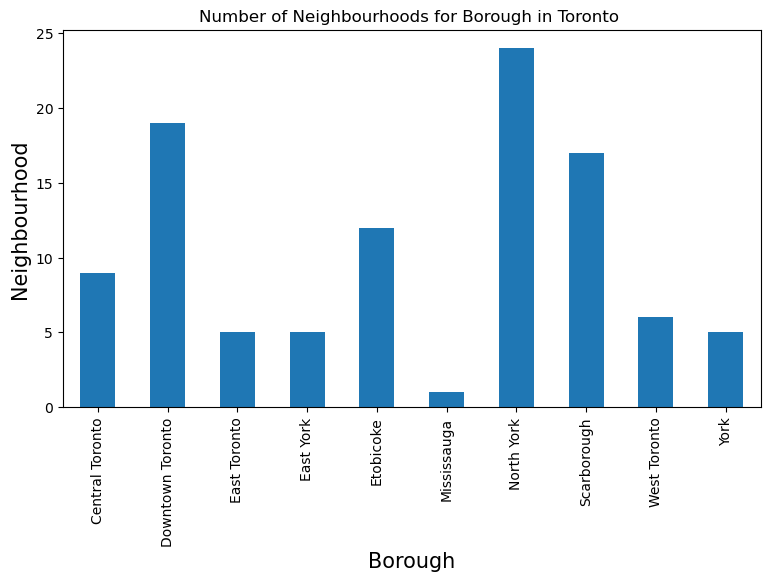

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighbourhoods for Borough in Toronto ')
# x-axis
plt.xlabel('Borough', fontsize = 15)
# y-axis
plt.ylabel('Neighbourhood', fontsize=15)
#setting a bar plot
toronto_df.groupby('Borough')['Neighbourhood'].count().plot(kind='bar')
#result
plt.show()

In this case, North York has the highest number of neighbourhoods.

In [11]:
pip install geocoder

     |████████████████████████████████| 102kB 11.3MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize




#### Foursquare API Usage

In [42]:
# code: NUTNULLUNGPCQQK2Z1U3PFKYSJ10IT5DDAT4UGCHDVQQKZH2#_=_
# accessToken: U4RIZLIH0241ZI4P00FQZYDBQ3SZPQMWKJY4GU0YTZEJKM4Q
CLIENT_ID = '3T23SQORTJ5GWWYMMWMUZQJLXZVMX3WZEOSXVCLO2CKS213O' # your Foursquare ID
CLIENT_SECRET = '44OFWBAGAXTB01GUTMZMDOOKFDSVPVE1TNH1QDUIXVMX4JUA' # your Foursquare Secret
ACCESS_TOKEN = 'U4RIZLIH0241ZI4P00FQZYDBQ3SZPQMWKJY4GU0YTZEJKM4Q' # your FourSquare Access Token
LIMIT = 100
radius = 1000
VERSION = 2018
def get_Data(lat,lang):
    CLIENT_ID = '3T23SQORTJ5GWWYMMWMUZQJLXZVMX3WZEOSXVCLO2CKS213O' # your Foursquare ID
    CLIENT_SECRET = '44OFWBAGAXTB01GUTMZMDOOKFDSVPVE1TNH1QDUIXVMX4JUA' # your Foursquare Secret
    ACCESS_TOKEN = 'U4RIZLIH0241ZI4P00FQZYDBQ3SZPQMWKJY4GU0YTZEJKM4Q' # your FourSquare Access Token
    LIMIT = 100
    radius = 1000
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN, latitude, longitude, radius, LIMIT)

    results = requests.get(url).json()
    venues=results['response']['venues']
    venue_details=[]
    try:
        venue_id=venues['id']
        venue_name=venues['name']
        venue_details.append([venue_id,venue_name])
    except KeyError:
        pass
        
    column_names=['ID','Name']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

print ("done")

done


In [43]:
def get_venue_details(venue_id):
        
    CLIENT_ID = '3T23SQORTJ5GWWYMMWMUZQJLXZVMX3WZEOSXVCLO2CKS213O' # i have changed the id with ##
    CLIENT_SECRET = '44OFWBAGAXTB01GUTMZMDOOKFDSVPVE1TNH1QDUIXVMX4JUA' # i have changed the secret with ##
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(venue_id,
            CLIENT_ID, 
            CLIENT_SECRET)


    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
       
        venue_details.append([venue_id,venue_name])
    except KeyError:
        pass
        
    column_names=['ID','Name']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

#### Geographical Data of Toronto
thus, geolocator has been applied to find out the latitude and longitude of toronto

In [44]:
address ='Toronto, Ontario'
# get geo location of address
geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [45]:
search_query = 'Chinese Restaurant'
radius = 10000
print(search_query + ' .... OK!')

Chinese Restaurant .... OK!


In [46]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
#url

In [47]:
results = requests.get(url).json()
results

{'meta': {'code': 410,
  'errorType': 'param_error',
  'errorDetail': 'The Foursquare API no longer supports requests that pass in a version v <= 20120609. For more details see https://developer.foursquare.com/overview/versioning',
  'requestId': '6005ea4bcde0a63d8ac78827'},
 'response': {}}

In [20]:
def get_data():
    url='http://cocl.us/Geospatial_data'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighbourhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    to_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        to_data = to_data.append({'Borough': borough,
                                          'Neighbourhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return to_data

In [252]:
# prepare neighborhood list that contains chinese resturants
column_names=['Borough', 'Neighbuorhood', 'ID','Name']
chinese_restaurant=pd.DataFrame(columns=column_names)
count=1
for row in toronto_df.values.tolist():
    Borough, Neighbourhood, Latitude, Longitude=row
    venues = get_Data(Latitude,Longitude)
    chinese_resturants=venues[venues['Categories']=='Chinese Restaurant']   
    print('(',count,'/',len(toronto_df),')','Chinese Resturants in '+Neighbourhood+', '+Borough+':'+chinese_resturants)
    for resturant_detail in chinese_resturants.values.tolist():
        id, name , category=resturant_detail
        chinese_restaurant = chinese_restaurant.append({'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

IndexError: tuple index out of range

#### Get relevant part of JSON and transform it into a _pandas_ dataframe

In [218]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.postalCode,location.neighborhood,venuePage.id
0,53973080498e97c3af5edb92,ILSC-Toronto Chinese Catholic Centre Campus,"[{'id': '52e81612bcbc57f1066b7a48', 'name': 'L...",v-1610775284,False,202 St Patrick St,43.655427,-79.390848,"[{'label': 'display', 'lat': 43.65542737655215...",597,CA,Toronto,ON,Canada,"[202 St Patrick St, Toronto ON]",NaN,NaN,NaN,NaN
1,4d06c1ccc2e53704428cc567,North-East Chinese Restaurant 華北美食,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1610775284,False,476 Dundas St.,43.653185,-79.396677,"[{'label': 'display', 'lat': 43.6531846832903,...",1026,CA,Toronto,ON,Canada,"[476 Dundas St. (Huron), Toronto ON]",Huron,NaN,NaN,NaN
2,4b622bf1f964a5200b3a2ae3,Chinese Traditional Buns,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1610775284,False,536 Dundas St. W,43.652714,-79.399006,"[{'label': 'display', 'lat': 43.65271411616852...",1216,CA,Toronto,ON,Canada,"[536 Dundas St. W (at Spadina Ave), Toronto ON...",at Spadina Ave,M5T 1H3,Kensington Market,NaN
3,4fd3ea3ee4b0191b9c2b1aff,Rosewood Chinese Cuisine,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1610775284,False,463 Dundas St. W.,43.653171,-79.396710,"[{'label': 'display', 'lat': 43.65317123090316...",1029,CA,Toronto,ON,Canada,"[463 Dundas St. W. (at Larch St.), Toronto ON ...",at Larch St.,M5T 1G8,NaN,NaN
4,4b072e9df964a52009f922e3,Sky Dragon Chinese Restaurant 龍翔酒樓,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",v-1610775284,False,280 Spadina Ave.,43.652783,-79.398174,"[{'label': 'display', 'lat': 43.65278331265585...",1149,CA,Toronto,ON,Canada,"[280 Spadina Ave. (at Dundas St. W.), Toronto ON]",at Dundas St. W.,NaN,NaN,NaN
5,4f04779a02d5cce0cfc06151,Chinese Visa Application Service Center,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",v-1610775284,False,"393 University Ave, Suite 1501",43.654028,-79.387365,"[{'label': 'display', 'lat': 43.65402839343005...",282,CA,Toronto,ON,Canada,"[393 University Ave, Suite 1501 (in University...",in University Centre,NaN,NaN,NaN
6,4b2027b5f964a520f82d24e3,Hong Shing Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1610775284,False,195 Dundas St W,43.654925,-79.387089,"[{'label': 'display', 'lat': 43.65492521335936...",300,CA,Toronto,ON,Canada,"[195 Dundas St W (at University Ave), Toronto ...",at University Ave,M5G 1C7,NaN,60327598
7,52a7ae41498eed3af4d0a3fa,Yueh Tung Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1610775284,False,126 Elizabeth St.,43.655281,-79.385337,"[{'label': 'display', 'lat': 43.65528126342919...",229,CA,Toronto,ON,Canada,"[126 Elizabeth St. (Dundas St.), Toronto ON M5...",Dundas St.,M5G 1P5,NaN,NaN
8,534aaebf498eee83e7fd2e7c,Chinese Freemasons Association,"[{'id': '52e81612bcbc57f1066b7a35', 'name': 'C...",v-1610775284,False,436 Dundas St W,43.653583,-79.395649,"[{'label': 'display', 'lat': 43.65358341087621...",943,CA,Toronto,ON,Canada,"[436 Dundas St W, Toronto ON]",NaN,NaN,NaN,NaN
9,5202d246498e9649c88150b7,Toronto Chinese Academy,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1610775284,False,133 Richmond Street West,43.650140,-79.384857,"[{'label': 'display', 'lat': 43.65014006138457...",379,CA,Toronto,ON,Canada,"[133 Richmond Street West (York Street), Toron...",York Street,M5H 2L3,Financial District,NaN


#### Define information of interest and filter dataframe



In [17]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

NameError: name 'dataframe' is not defined

In [18]:
dataframe_filtered.name

NameError: name 'dataframe_filtered' is not defined

In [164]:
dataframe_filtered.shape

(30, 16)

In [100]:
! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')

Folium installed


In [189]:
venues_map = folium.Map(location=[43.6534817, -79.3839347], zoom_start=15) # generate map centred around the Conrad Hotel



# add the Chinese restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [213]:
longitude =  -79.3832
latitude = 43.6532
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon,label in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color='green',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)
       
display(map_clusters)

## Cluster Neighbourhood

Run k-means to cluster the neighbourhood into 5 clusters.